<a href="https://colab.research.google.com/github/khotimnr/PascaIPB/blob/main/Tugas_Praktikum_Text_Analytics_Kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PENGGEROMBOLAN DATA KONTEN ARTIKEL BERITA TEMPO TAHUN 2020**

---
Kelompok 2
---
Nur Khotimah (G1501201012)

Fardilla Rahmawati (G14170017)




## **IMPOR DATA**

**Import data berbentuk csv maka membutuhkan package** `pandas`

In [ ]:
import pandas as pd

**Data di import dari file yang disimpan di dalam google drive yang mana nanti membutuhkan autorisasisehingga tahapannya adalah sebagai berikut.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv (r'/content/drive/MyDrive/tempo_tugas.csv')
print(data)
df = pd.DataFrame(data, columns= ['content'])
print (df)

       Unnamed: 0                                            content
0               3  ,  - Gilead Sciences Inc mempublikasikan hasil...
1               4  ,  - Seorang wali kota di Peru pura-pura jadi ...
2               8  ,  - Kementerian Komunikasi dan Informatika (K...
3              14  ,  - Plt Gubernur Kepulauan Riau (Kepri) Isdia...
4              21   - Menteri Perdagangan (Mendag) Agus Suparmant...
...           ...                                                ...
13401      173232   Dinas Kesehatan atau Dinkes DKI Jakarta menya...
13402      173258  ,  -Untuk mengantisipasi penyebaran , Dinas Ke...
13403      173279  ,  - Gedung BRI II di kawasan Bendungan Hilir,...
13404      173287  ,  - Malaysia mengkonfirmasi tiga kasus pertam...
13405      173562  ,  - Cina membentuk tim riset nasional yang te...

[13406 rows x 2 columns]
                                                 content
0      ,  - Gilead Sciences Inc mempublikasikan hasil...
1      ,  - Seorang wali kota di

**Untuk melihat 5 baris pertama dan 5 baris terakhir pada data.**

In [ ]:
df.head

<bound method NDFrame.head of                                                  content
0      ,  - Gilead Sciences Inc mempublikasikan hasil...
1      ,  - Seorang wali kota di Peru pura-pura jadi ...
2      ,  - Kementerian Komunikasi dan Informatika (K...
3      ,  - Plt Gubernur Kepulauan Riau (Kepri) Isdia...
4       - Menteri Perdagangan (Mendag) Agus Suparmant...
...                                                  ...
13401   Dinas Kesehatan atau Dinkes DKI Jakarta menya...
13402  ,  -Untuk mengantisipasi penyebaran , Dinas Ke...
13403  ,  - Gedung BRI II di kawasan Bendungan Hilir,...
13404  ,  - Malaysia mengkonfirmasi tiga kasus pertam...
13405  ,  - Cina membentuk tim riset nasional yang te...

[13406 rows x 1 columns]>

**Untuk melihat dimensi data atau banyaknya baris dan kolom pada data**

In [ ]:
df.shape

(13406, 1)

**Untuk melihat 5 baris pertama dari data dengan hanya menampilkan kolom content**

In [ ]:
content = df["content"]
content.head()

0    ,  - Gilead Sciences Inc mempublikasikan hasil...
1    ,  - Seorang wali kota di Peru pura-pura jadi ...
2    ,  - Kementerian Komunikasi dan Informatika (K...
3    ,  - Plt Gubernur Kepulauan Riau (Kepri) Isdia...
4     - Menteri Perdagangan (Mendag) Agus Suparmant...
Name: content, dtype: object

**Ingin dilakukan pengecekan apakah terdapat NA pada data.**

In [ ]:
print("Jumlah amatan NaN adalah",content.isnull().sum())
print("Contoh amatan yang NAN")
content.loc[content.isnull()].head()

Jumlah amatan NaN adalah 0
Contoh amatan yang NAN


Series([], Name: content, dtype: object)

Dapat dilihat bahwa tidak ada baris data yang mengandung NA.

## **TEXT PROCESSING**

### **1. Noise Removal**




**Tahapan ini dilakukan untuk membuang karakter-karakter yang tidak memiliki makna seperti ‘ ,’ dan tanda baca.**

In [ ]:
import string
def noise_removal(words):
    words = words.translate(str.maketrans('', '', string.punctuation + string.digits))
    words = words.strip()
    return words

In [ ]:
content_clean = content.str.lower()
content_clean = content_clean.apply(noise_removal)

In [ ]:
content_clean.head()

0    gilead sciences inc mempublikasikan hasil uji ...
1    seorang wali kota di peru purapura jadi korban...
2    kementerian komunikasi dan informatika kominfo...
3    plt gubernur kepulauan riau kepri isdianto yak...
4    menteri perdagangan mendag agus suparmanto men...
Name: content, dtype: object

### **2. Tokenization**

**Tahapan ini dilakukan untuk mngambil elemen terkecil dari dokumen, pada analisis ini adalah kata.**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize 
def tokenize_fun(words):
    return word_tokenize(words)

In [ ]:
content_clean = content_clean.apply(tokenize_fun)
content_clean.head()

0    [gilead, sciences, inc, mempublikasikan, hasil...
1    [seorang, wali, kota, di, peru, purapura, jadi...
2    [kementerian, komunikasi, dan, informatika, ko...
3    [plt, gubernur, kepulauan, riau, kepri, isdian...
4    [menteri, perdagangan, mendag, agus, suparmant...
Name: content, dtype: object

### **3. Normalization**

**Tahapan ini dilakukan untuk menyamakan bentuk dan pembakuan kata yang tidak baku menjadi baku.**

In [ ]:
indo_slang_words = pd.read_csv("https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv")
indo_slang_words.head()

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0


In [ ]:
new_entry = pd.DataFrame(data={"slang":["bokis"],"formal":["bohong"],"In-dictionary":[" "],"context":[" "],
                          "category1":[" "],"category2":[" "],"category3":[" "]})
new_indo_slang_words = pd.concat([indo_slang_words,new_entry])
new_indo_slang_words.tail()

,slang,formal,In-dictionary,context,category1,category2,category3
15002,gtau,enggak tau,0,Stidaknya mrka may berkarya Dan berusaha yg tr...,akronim,abreviasi,0
15003,gatau,enggak tau,0,Ih gatau malu,akronim,0,0
15004,fans2,fan-fan,0,Jkt48 adalah tempat di mana sesama fans saling...,reduplikasi,naturalisasi,0
15005,gaharus,enggak harus,0,belajar tuh bisa dimana aja gaharus belajar di...,akronim,0,0
0,bokis,bohong,,,,,


In [ ]:
def replace_slang_word(words):
    for index in  range(0,len(words)-1):
        index_slang = indo_slang_words.slang==words[index]
        formal = list(set(indo_slang_words[index_slang].formal))
        if len(formal)==1:
            words[index]=formal[0]
    return words

In [ ]:
content_clean = content_clean.apply(replace_slang_word)

In [ ]:
content_clean.head()

0    [gilead, sciences, inc, mempublikasikan, hasil...
1    [seorang, wali, kota, di, peru, purapura, jadi...
2    [kementerian, komunikasi, dan, informatika, ko...
3    [plt, gubernur, kepulauan, riau, kepri, isdian...
4    [menteri, perdagangan, mendag, agus, suparmant...
Name: content, dtype: object

### **4.  Menghapus Stopwords**

**Tahapan ini dilakukan untuk membuang kata umum (atau kata khusus) seperti dari, ke, pada, yang, dst.**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
indo_stopwords = stopwords.words('indonesian')

In [ ]:
# menambhakan stopwords bahasa indonesia
indo_stopwords.append("nya")

In [ ]:
#fungsi menghapus stopword
def stopwords_removal(words):
    return [word for word in words if word not in indo_stopwords]

In [ ]:
content_clean.head()

0    [gilead, sciences, inc, mempublikasikan, hasil...
1    [seorang, wali, kota, di, peru, purapura, jadi...
2    [kementerian, komunikasi, dan, informatika, ko...
3    [plt, gubernur, kepulauan, riau, kepri, isdian...
4    [menteri, perdagangan, mendag, agus, suparmant...
Name: content, dtype: object

In [ ]:
content_clean2 = content_clean.apply(stopwords_removal)

In [ ]:
content_clean2.head()

0    [gilead, sciences, inc, mempublikasikan, hasil...
1    [wali, kota, peru, purapura, korban, meninggal...
2    [kementerian, komunikasi, informatika, kominfo...
3    [plt, gubernur, kepulauan, riau, kepri, isdian...
4    [menteri, perdagangan, mendag, agus, suparmant...
Name: content, dtype: object

### **5. Stemming**

**Tahapan ini dilakukan untuk membuang imbuhan (seperti prefiks dan sufiks).**

In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 3.9MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
def stemmer_func(word):
    return stemmer.stem(word)

In [ ]:
word_dict = {}

for document in content_clean2:
    for word in document:
        if word not in word_dict:
            word_dict[word] = ' '

for word in word_dict:
    word_dict[word] = stemmer_func(word)

In [ ]:
def get_stemmer_word(document):
    return [word_dict[word] for word in document]

In [ ]:
content_clean3 = content_clean2.apply(get_stemmer_word)

In [ ]:
content_clean3.head()

0    [gilead, sciences, inc, publikasi, hasil, uji,...
1    [wali, kota, peru, purapura, korban, tinggal, ...
2    [menteri, komunikasi, informatika, kominfo, gu...
3    [plt, gubernur, pulau, riau, kepri, isdianto, ...
4    [menteri, dagang, mendag, agus, suparmanto, bu...
Name: content, dtype: object

### **6. Convert to Text**

**Tahapan ini dilakukan untuk Menyatukan token-token (kata) menjadi satu kalimat.**

In [ ]:
def list_to_text(token):
    text = " "
    return text.join(token)

In [ ]:
content_clean_fin = content_clean3.apply(list_to_text)
content_clean_fin.head()

0    gilead sciences inc publikasi hasil uji baru g...
1    wali kota peru purapura korban tinggal covid b...
2    menteri komunikasi informatika kominfo guna ti...
3    plt gubernur pulau riau kepri isdianto daerah ...
4    menteri dagang mendag agus suparmanto buka mal...
Name: content, dtype: object

### **Menampilkan WordCloud**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
content_text = content_clean_fin.to_string()

In [ ]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate(content_text)

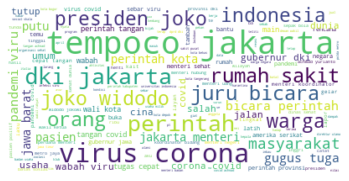

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

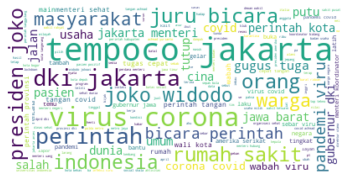

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan wordcloud diatas kata 'tempoco' bisa kita anggap sebagai stopwords karena data kita adalah data yang berasal dari berita tempo sehingga kata 'tempoco' pasti ada di dalam content, sehingga kurang bermakna dalam kasus ini.

Sebagai catatan, bentuk wordcloud tidaklah unik sehingga jika dilakukan running dengan syntax yg sama akan membentuk wordcloud yang berbeda akan tetapi dengan makna yang sama.

### **Menghapus Kata 'tempoco'**

In [ ]:
def remove_certain_word(words,text):
    return [word for word in words if word not in text]

In [ ]:
content_clean3 = content_clean3.apply(lambda x: remove_certain_word(x,"tempoco"))
content_clean_fin = content_clean3.apply(list_to_text)

In [ ]:
content_clean_fin[content_clean_fin.str.contains("tempoco")]

818     wabah virus corona covid indonesia khawatir se...
1925    tempocotangerang pt angkasa pura ii persero ka...
Name: content, dtype: object

In [ ]:
content_clean_fin.head

<bound method NDFrame.head of 0        gilead sciences inc publikasi hasil uji baru g...
1        wali kota peru purapura korban tinggal covid b...
2        menteri komunikasi informatika kominfo guna ti...
3        plt gubernur pulau riau kepri isdianto daerah ...
4        menteri dagang mendag agus suparmanto buka mal...
                               ...                        
13401    dinas sehat dinkes dki jakarta obat khusus vak...
13402    antisipasi sebar dinas sehat dki jakarta imbau...
13403    gedung bri ii kawasan bendung hilir jakarta pu...
13404    malaysia konfirmasi   sehat malaysia   ahmad o...
13405    cina bentuk tim riset nasional ahli cegah kend...
Name: content, Length: 13406, dtype: object>

## **TF IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_result = tf_idf_vectorizer.fit_transform(content_clean_fin)
tf_idf_result_df = pd.DataFrame(tf_idf_result.toarray(),columns=tf_idf_vectorizer.get_feature_names())
tf_idf_result_df.sum(axis=0).T.sort_values(ascending=False)

virus               458.113200
orang               451.869832
pasien              409.511663
corona              395.122638
covid               384.814145
                       ...    
pesannamun            0.025197
paledangsebanyak      0.025197
kaiid                 0.025197
keretaapikita         0.025197
cskaiid               0.025197
Length: 25622, dtype: float64

**N-GRAM**

**N-gram adalah potongan N-karakter yang diambil dari suatu string.**

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

**Mengurutkan token TF IDF berdasarkan yang paling besar.**

In [ ]:
tf_idf_result_df.sum(axis=0).T.sort_values(ascending=False)

virus               458.113200
orang               451.869832
pasien              409.511663
corona              395.122638
covid               384.814145
                       ...    
pesannamun            0.025197
paledangsebanyak      0.025197
kaiid                 0.025197
keretaapikita         0.025197
cskaiid               0.025197
Length: 25622, dtype: float64

**Membuat dataframe dfngram dari hasil TF IDF.**

In [ ]:
dfngram = pd.DataFrame(tf_idf_result_df)

In [ ]:
tf_idf_result_df.head()

,aacomtr,aacomtrdalam,aacomtrpbb,aaditya,aakar,aakarabyasa,aam,aan,aao,aaron,ababa,abad,abadi,abai,abang,abar,abbas,abbott,abc,abdelaziz,abdellatif,abdi,abdillah,abdul,abdulaziz,abduldata,abdulkadir,abdullah,abdullatif,abdulmadjid,abdulwahab,abdurahman,abdurrahman,abe,aberdeenshire,abi,abidin,abigail,abipraya,abk,...,zikir,zimbabwe,zinc,zipse,zita,zlatan,zlatko,zock,zoe,zoelkifli,zohri,zombi,zombiada,zombie,zona,zonapada,zonapertama,zonazona,zone,zoologi,zoom,zoomov,zoomsaat,zoonosis,zoonotik,zorabots,zorreguieta,zssedangkan,zuckerberg,zuhur,zulfikar,zulfikri,zulkarnaen,zulkieflimansyah,zulkifli,zumba,zurbuchen,zurich,zweli,zynga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dfngram.head()

,aacomtr,aacomtrdalam,aacomtrpbb,aaditya,aakar,aakarabyasa,aam,aan,aao,aaron,ababa,abad,abadi,abai,abang,abar,abbas,abbott,abc,abdelaziz,abdellatif,abdi,abdillah,abdul,abdulaziz,abduldata,abdulkadir,abdullah,abdullatif,abdulmadjid,abdulwahab,abdurahman,abdurrahman,abe,aberdeenshire,abi,abidin,abigail,abipraya,abk,...,zikir,zimbabwe,zinc,zipse,zita,zlatan,zlatko,zock,zoe,zoelkifli,zohri,zombi,zombiada,zombie,zona,zonapada,zonapertama,zonazona,zone,zoologi,zoom,zoomov,zoomsaat,zoonosis,zoonotik,zorabots,zorreguieta,zssedangkan,zuckerberg,zuhur,zulfikar,zulfikri,zulkarnaen,zulkieflimansyah,zulkifli,zumba,zurbuchen,zurich,zweli,zynga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Membuat baris baru yang berada di paling bawah dataframe dfngram dengan value adalah jumlah bobot per kolom atau per token atau per kata.**

In [ ]:
dfngram.loc['Total',:] = dfngram.sum(axis=0)
dfngram.iloc[:, np.argsort(dfngram.loc['Total'])]

,cskaiid,keretaapikita,kaiid,paledangsebanyak,pesannamun,umumpemberhentian,ptun,pkedkpp,konstitusionalitas,phpudprdprdxviidalam,normatifputusan,lppladmriviii,persidanganpengadu,etikputusan,terampunidkpp,hukummk,mengikatsesungguhnya,dkpptafsiran,dolardry,dmtturun,laterithematitmagnetit,metalbesaran,februarilaman,corrective,payable,dolardmt,acuanhma,acuanhba,dmthma,berkurangharga,export,icdx,icdxantara,ici,tonkepala,titanium,ilmenit,hma,veseelnilai,derivatives,...,tular,masker,rp,sosial,daerah,milik,tugas,mei,infeksi,wabah,batas,usaha,persen,dki,kerja,warga,pandemi,tinggal,jalan,negara,bantu,april,sebar,menteri,kota,tangan,maret,indonesia,positif,masyarakat,jakarta,sakit,sehat,perintah,rumah,covid,corona,pasien,orang,virus
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025755,0.000000,0.000000,0.000000,0.027440,0.204817,0.000000,0.000000,0.000000,0.022037,0.024745,0.022349,0.000000,0.000000,0.021267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022231,0.000000,0.000000,0.019512,0.058174,0.000000,0.194198,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.043866,0.000000,0.000000,0.000000,0.000000,0.000000,0.034127,0.000000,0.030728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029200,0.065576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071687,0.025854,0.038542,0.019780,0.032165,0.000000,0.038049
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027046,0.000000,0.000000,0.000000,0.000000,0.030726,0.000000,0.000000,0.000000,0.069423,0.000000,0.000000,0.000000,0.054843,0.000000,0.000000,0.050120,0.000000,0.000000,0.000000,0.023318,0.000000,0.092663,0.000000,0.000000,0.000000,0.000000,0.000000,0.030545,0.015676,0.000000,0.000000,0.015077
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.051798,0.000000,0.000000,0.133199,0.000000,0.083325,0.080596,0.000000,0.036284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034479,0.038716,0.069936,0.000000,0.000000,0.000000,0.032817,0.000000,0.042265,0.034337,0.000000,0.000000,0.037657,0.103548,0.000000,0.034784,0.029703,0.000000,0.030528,0.113776,0.023357,0.189906,0.144858,0.022464
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...

In [ ]:
total = dfngram.loc['Total'].sort_values(ascending = False)

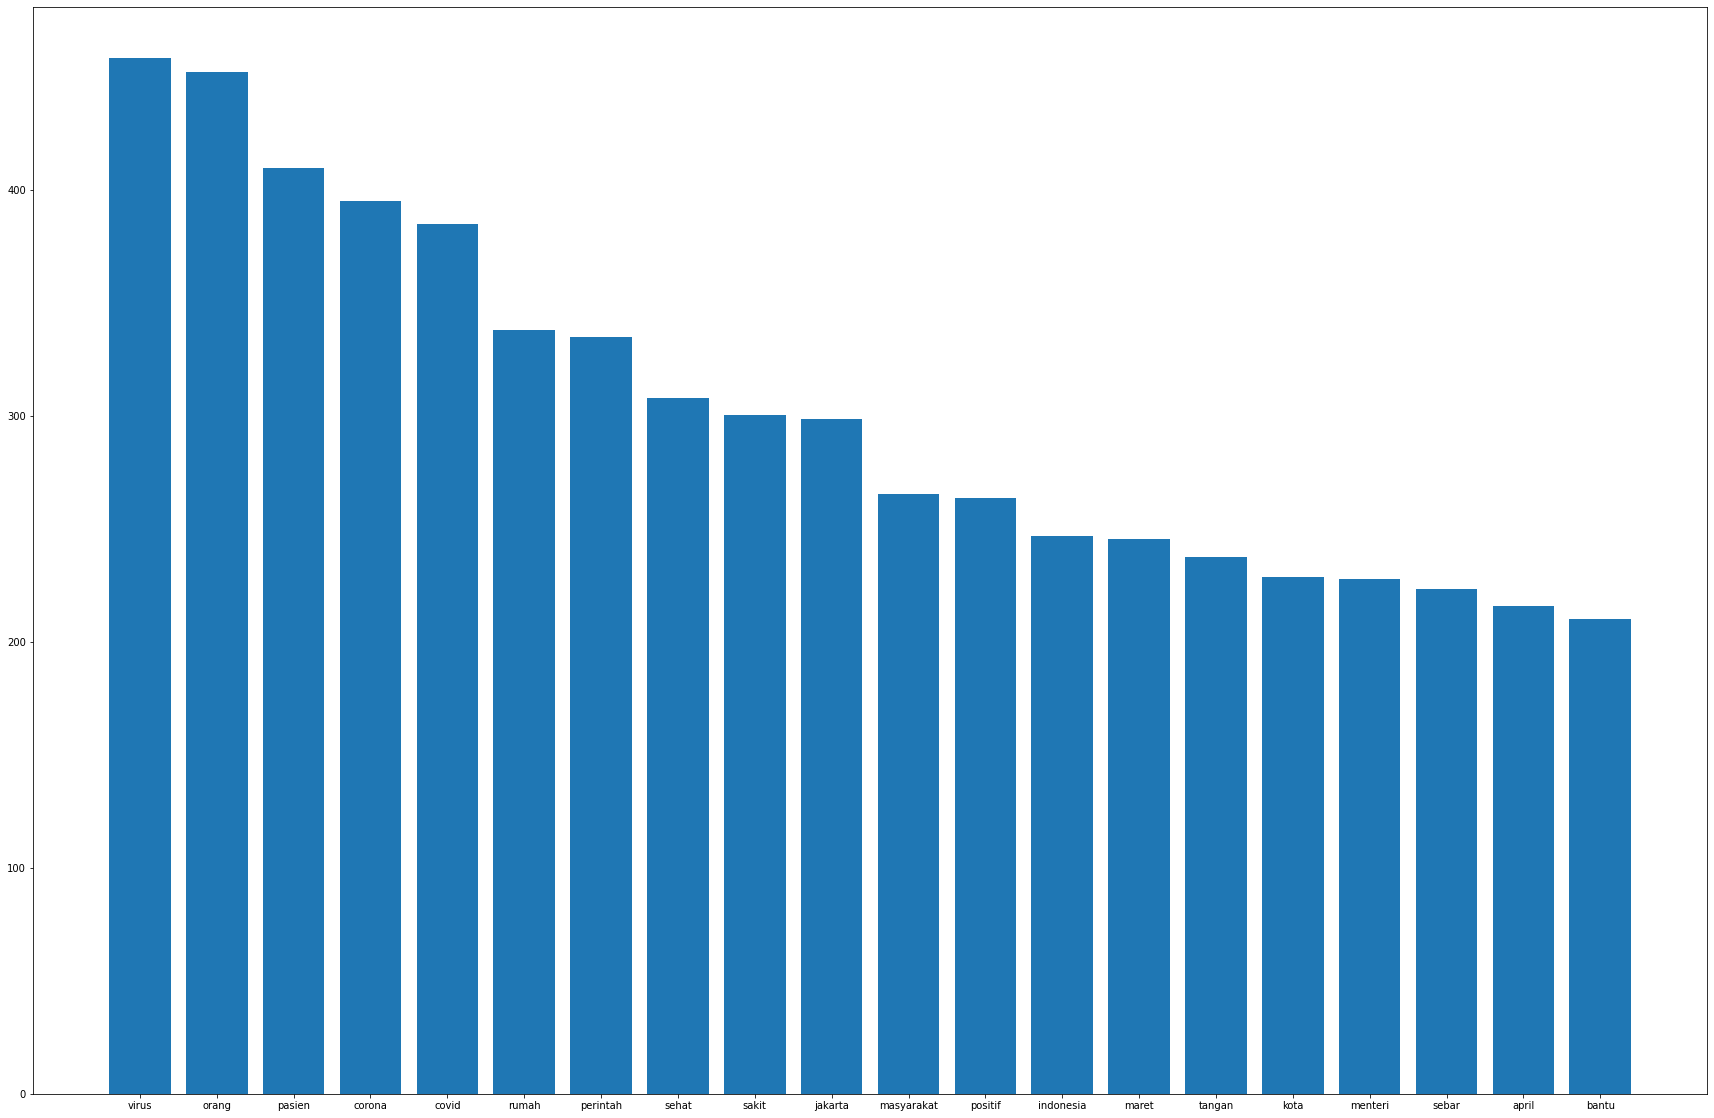

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (30, 20))
plt.bar(total[:20].index, total[:20])
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)
plt.show()

**Dapat terlihat visualisasi per kata atau per satu kata berdasarkan bobot TF IDF terbesar**

In [ ]:
dfngram.head()

,aacomtr,aacomtrdalam,aacomtrpbb,aaditya,aakar,aakarabyasa,aam,aan,aao,aaron,ababa,abad,abadi,abai,abang,abar,abbas,abbott,abc,abdelaziz,abdellatif,abdi,abdillah,abdul,abdulaziz,abduldata,abdulkadir,abdullah,abdullatif,abdulmadjid,abdulwahab,abdurahman,abdurrahman,abe,aberdeenshire,abi,abidin,abigail,abipraya,abk,...,zikir,zimbabwe,zinc,zipse,zita,zlatan,zlatko,zock,zoe,zoelkifli,zohri,zombi,zombiada,zombie,zona,zonapada,zonapertama,zonazona,zone,zoologi,zoom,zoomov,zoomsaat,zoonosis,zoonotik,zorabots,zorreguieta,zssedangkan,zuckerberg,zuhur,zulfikar,zulfikri,zulkarnaen,zulkieflimansyah,zulkifli,zumba,zurbuchen,zurich,zweli,zynga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#dftext = pd.DataFrame(content_clean_fin)
dftext = pd.DataFrame(content_clean2)
dftext.head()

,content
0,gilead sciences inc publikasi hasil uji baru g...
1,wali kota peru purapura korban tinggal covid b...
2,menteri komunikasi informatika kominfo guna ti...
3,plt gubernur pulau riau kepri isdianto daerah ...
4,menteri dagang mendag agus suparmanto buka mal...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# untuk 2 kata
vectorizer2 = CountVectorizer(ngram_range =(2,2), min_df = 1)
doc_matrixn2 = vectorizer2.fit_transform(dftext.apply(lambda x: np.str_(x)))
# untuk 3 kata
vectorizer3 = CountVectorizer(ngram_range =(3,3), min_df = 1)
doc_matrixn3 = vectorizer3.fit_transform(dftext.apply(lambda x: np.str_(x)))

doc_matrixn2 = doc_matrixn2.toarray()
doc_matrixn3 = doc_matrixn3.toarray()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# untuk 2 kata
vectorizer2 = CountVectorizer(ngram_range =(2,2), min_df = 1)
doc_matrixn2 = vectorizer2.fit_transform(dfngram.apply(lambda x: np.str_(x)))
# untuk 3 kata
vectorizer3 = CountVectorizer(ngram_range =(3,3), min_df = 1)
doc_matrixn3 = vectorizer3.fit_transform(dfngram.apply(lambda x: np.str_(x)))

doc_matrixn2 = doc_matrixn2.toarray()
doc_matrixn3 = doc_matrixn3.toarray()

In [ ]:
# 2 kata
doc_dfn2 = pd.DataFrame(data = doc_matrixn2)
doc_dfn2.columns = vectorizer2.get_feature_names()
display(doc_dfn2.head())

# 3 kata
doc_dfn3 = pd.DataFrame(data = doc_matrixn3)
doc_dfn3.columns = vectorizer3.get_feature_names()
display(doc_dfn3.head())

,13401 dinas,13402 antisipasi,13403 gedung,13404 malaysia,13405 cina,13406 dtype,agus suparmanto,ahli cegah,ahmad 13405,antisipasi sebar,baru wali,bendung hilir,bentuk tim,bri ii,buka mal,cegah kend,cina bentuk,content length,covid menteri,daerah menteri,dagang mendag,dinas sehat,dinkes dki,dki jakarta,dtype object,gedung bri,gilead sciences,gubernur pulau,guna ti,hasil uji,hilir jakarta,ii kawasan,imbau 13403,inc publikasi,informatika kominfo,isdianto daerah,jakarta imbau,jakarta obat,jakarta pu,kawasan bendung,kend name,kepri isdianto,khusus vak,kominfo guna,komunikasi informatika,konfirmasi sehat,korban tinggal,kota peru,length 13406,mal 13401,malaysia ahmad,malaysia konfirmasi,mendag agus,menteri dagang,menteri komunikasi,name content,nasional ahli,obat khusus,peru purapura,plt gubernur,pu 13404,publikasi hasil,pulau riau,purapura korban,riau kepri,riset nasional,sciences inc,sebar dinas,sehat dinkes,sehat dki,sehat malaysia,suparmanto buka,ti plt,tim riset,tinggal covid,uji baru,vak 13402,wali kota
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


,13401 dinas sehat,13402 antisipasi sebar,13403 gedung bri,13404 malaysia konfirmasi,13405 cina bentuk,13406 dtype object,agus suparmanto buka,ahli cegah kend,ahmad 13405 cina,antisipasi sebar dinas,baru wali kota,bendung hilir jakarta,bentuk tim riset,bri ii kawasan,buka mal 13401,cegah kend name,cina bentuk tim,content length 13406,covid menteri komunikasi,daerah menteri dagang,dagang mendag agus,dinas sehat dinkes,dinas sehat dki,dinkes dki jakarta,dki jakarta imbau,dki jakarta obat,gedung bri ii,gilead sciences inc,gubernur pulau riau,guna ti plt,hasil uji baru,hilir jakarta pu,ii kawasan bendung,imbau 13403 gedung,inc publikasi hasil,informatika kominfo guna,isdianto daerah menteri,jakarta imbau 13403,jakarta obat khusus,jakarta pu 13404,kawasan bendung hilir,kend name content,kepri isdianto daerah,khusus vak 13402,kominfo guna ti,komunikasi informatika kominfo,konfirmasi sehat malaysia,korban tinggal covid,kota peru purapura,length 13406 dtype,mal 13401 dinas,malaysia ahmad 13405,malaysia konfirmasi sehat,mendag agus suparmanto,menteri dagang mendag,menteri komunikasi informatika,name content length,nasional ahli cegah,obat khusus vak,peru purapura korban,plt gubernur pulau,pu 13404 malaysia,publikasi hasil uji,pulau riau kepri,purapura korban tinggal,riau kepri isdianto,riset nasional ahli,sciences inc publikasi,sebar dinas sehat,sehat dinkes dki,sehat dki jakarta,sehat malaysia ahmad,suparmanto buka mal,ti plt gubernur,tim riset nasional,tinggal covid menteri,uji baru wali,vak 13402 antisipasi,wali kota peru
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# 2 kata
doc_dfn2.loc['Total',:] = doc_dfn2.sum(axis=0)
doc_dfn2.loc['Total'].head()

# 3 kata
doc_dfn3.loc['Total',:] = doc_dfn3.sum(axis=0)
doc_dfn3.loc['Total'].head()

13401 dinas sehat            1.0
13402 antisipasi sebar       1.0
13403 gedung bri             1.0
13404 malaysia konfirmasi    1.0
13405 cina bentuk            1.0
Name: Total, dtype: float64

In [ ]:
# 2 kata
doc_dfn2.iloc[:, np.argsort(doc_dfn2.loc['Total'])]
 
# 3 kata
doc_dfn3.iloc[:, np.argsort(doc_dfn3.loc['Total'])]

,13401 dinas sehat,name content length,menteri komunikasi informatika,menteri dagang mendag,mendag agus suparmanto,malaysia konfirmasi sehat,malaysia ahmad 13405,mal 13401 dinas,nasional ahli cegah,length 13406 dtype,korban tinggal covid,konfirmasi sehat malaysia,komunikasi informatika kominfo,kominfo guna ti,khusus vak 13402,kepri isdianto daerah,kend name content,kota peru purapura,kawasan bendung hilir,obat khusus vak,plt gubernur pulau,uji baru wali,tinggal covid menteri,tim riset nasional,ti plt gubernur,suparmanto buka mal,sehat malaysia ahmad,sehat dki jakarta,peru purapura korban,sehat dinkes dki,sciences inc publikasi,riset nasional ahli,riau kepri isdianto,purapura korban tinggal,pulau riau kepri,publikasi hasil uji,pu 13404 malaysia,sebar dinas sehat,vak 13402 antisipasi,jakarta pu 13404,jakarta imbau 13403,cina bentuk tim,cegah kend name,buka mal 13401,bri ii kawasan,bentuk tim riset,bendung hilir jakarta,baru wali kota,content length 13406,antisipasi sebar dinas,ahli cegah kend,agus suparmanto buka,13406 dtype object,13405 cina bentuk,13404 malaysia konfirmasi,13403 gedung bri,13402 antisipasi sebar,ahmad 13405 cina,jakarta obat khusus,covid menteri komunikasi,dagang mendag agus,isdianto daerah menteri,informatika kominfo guna,inc publikasi hasil,imbau 13403 gedung,ii kawasan bendung,hilir jakarta pu,hasil uji baru,daerah menteri dagang,guna ti plt,gilead sciences inc,gedung bri ii,dki jakarta obat,dki jakarta imbau,dinkes dki jakarta,dinas sehat dki,dinas sehat dinkes,gubernur pulau riau,wali kota peru
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Total,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
ngram2 = doc_dfn2.loc['Total'].sort_values(ascending = False)
ngram2[:20]

dinas sehat            2.0
dki jakarta            2.0
wali kota              1.0
guna ti                1.0
dinkes dki             1.0
dtype object           1.0
gedung bri             1.0
gilead sciences        1.0
gubernur pulau         1.0
hasil uji              1.0
daerah menteri         1.0
hilir jakarta          1.0
ii kawasan             1.0
imbau 13403            1.0
inc publikasi          1.0
informatika kominfo    1.0
isdianto daerah        1.0
jakarta imbau          1.0
dagang mendag          1.0
covid menteri          1.0
Name: Total, dtype: float64

In [ ]:
ngram3 = doc_dfn3.loc['Total'].sort_values(ascending = False)
ngram3[:20]

wali kota peru              1.0
gubernur pulau riau         1.0
dinas sehat dinkes          1.0
dinas sehat dki             1.0
dinkes dki jakarta          1.0
dki jakarta imbau           1.0
dki jakarta obat            1.0
gedung bri ii               1.0
gilead sciences inc         1.0
guna ti plt                 1.0
daerah menteri dagang       1.0
hasil uji baru              1.0
hilir jakarta pu            1.0
ii kawasan bendung          1.0
imbau 13403 gedung          1.0
inc publikasi hasil         1.0
informatika kominfo guna    1.0
isdianto daerah menteri     1.0
dagang mendag agus          1.0
covid menteri komunikasi    1.0
Name: Total, dtype: float64

## **K-Means**

**Memilih Jumlah Cluster Optimum dengan `MiniBatchKMeans`**

In [ ]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans()

In [ ]:
!pip install yellowbrick

(pid=4595) /usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
(pid=4595)   y = column_or_1d(y, warn=True)


AttributeError: ignored

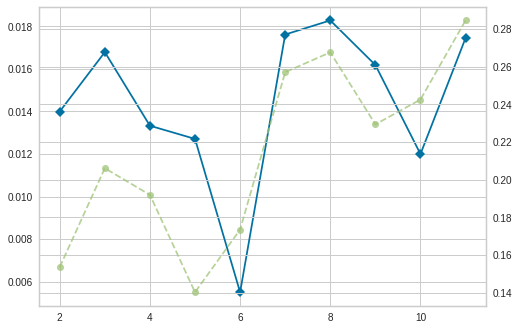

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Silhouette
kmeans_vis_sil = KElbowVisualizer(kmeans, k=(2,12),metric="silhouette")
kmeans_vis_sil.fit(tf_idf_result)        # Fit the data to the visualizer
kmeans_vis_sil.show()        # Finalize and render the figure

Pada Tahap ini digunakan k-Means MiniBatchKMeans. 
Dengan Langkah pertama mencari terlebih dahulu Jumlah Cluster Optimum

Terlihat Gambar disamping
**Maka Jumlah cluster optimum adalah 3 **

**Memilih Jumlah Cluster Optimum dengan `KMeans`**

AttributeError: ignored

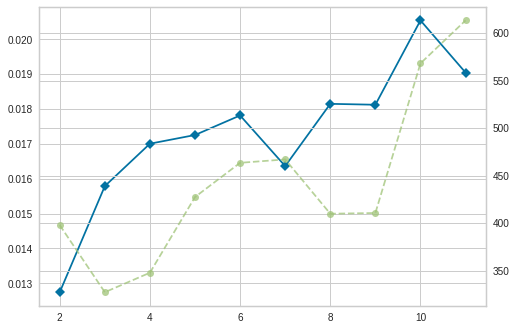

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kmeans = KMeans()

# Silhouette
kmeans_vis_sil = KElbowVisualizer(kmeans, k=(2,12),metric="silhouette")
kmeans_vis_sil.fit(tf_idf_result)        # Fit the data to the visualizer
kmeans_vis_sil.show()        # Finalize and render the figure

Pada Tahap ini digunakan k-Means KMeans. 
Dengan Langkah pertama mencari terlebih dahulu Jumlah Cluster Optimum

Terlihat Gambar disamping
Maka *Jumlah cluster optimum adalah 4*

**Menerapkan Model Cluster (k=4)**

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=4)
kmeans.fit(tf_idf_result)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=4, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

**Interpretasi Hasil Cluster**

In [ ]:
# extract cluster's label
cluster_label = pd.DataFrame(kmeans.predict(tf_idf_result),columns=["cluster"])

In [ ]:
tf_idf_df_lab = pd.concat([tf_idf_result_df,cluster_label],axis=1)

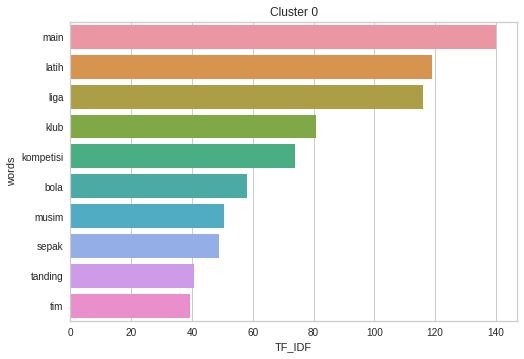

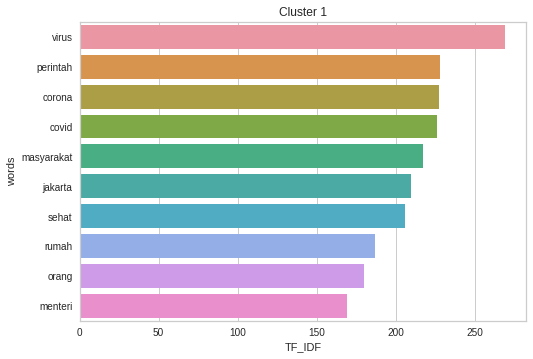

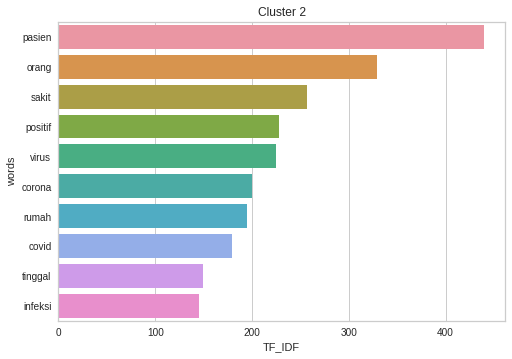

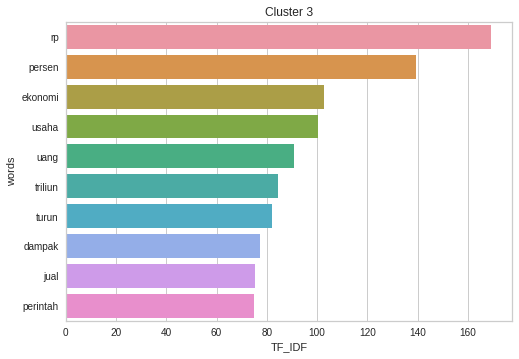

In [ ]:
import numpy as np
import seaborn as sns

for i in range(4):
    cluster_df = tf_idf_df_lab.groupby("cluster").sum().T.sort_values(ascending=False,by=i).head(10)[i].to_frame().reset_index()
    cluster_df.columns = ["words","TF_IDF"]
    sns.barplot(x="TF_IDF",y="words",data=cluster_df).set_title('Cluster '+str(i))
    plt.show()



> Berdasarkan Cluster diatas dapat di kelompokkan menjadi

1.   Cluster 0 = Berita Sepak Bola
2.   Cluster 1 = Berita Kebijakan Pemerintah Perilaku Hidup Sehat

3.   Cluster 2 = Berita Perintah Tinggal dirumah
4.   Cluster 3 = Berita Dampak Ekonomi







Terdapat  4 Cluster dari model yang ditentukan yakni Berita Sepak Bola, Kebijakan Pemerintah Pusat terkait Covid-19 baik pola Hidup Sehat, Perintah Tinggal di rumah, dan dampak covid terhadap pertumbuhan ekonomi yang terus turun.

Interpretasi Hasil Cluster menggunakan 10 kata-kata dengan frekuensi tertinggi dari masing-masing kluster. Kata-kata ini diukur dengan nilai TF-IDF dimana semakin besar nilainya maka semakin penting kata tersebut.


***Cluster 0 = Berita Sepak Bola***

Mengapa muncul cluster 0 yang merupakan olahraga khususnya Bola? Karena kabar tersebut sangat menjadi perbincangan hangat baik di dalam negeri maupun luar negeri. Berdasarkan Bobot TF IDF juga banyak perbincangan mengenai Kompetisi, Liga, Pemain, Pelatih, Klub, Pertandingan. Secara berita memang ada kontroversi tetap berjalan atau di pending.
Cluster ini merupakan cluster dengan konten berita paling banyak yang membahas tentang sepak bola, dimana berita-berita di dalam kluster tersebut lebih banyak membahas pada kompetisi atau pertandingan antar club atau tim sepak bola pada liga-liga tertentu. Mengapa sepak bola? Sepak bola banyak diminati dan sebagaimana yang diketahui bahwa pada tahun 2020 adalah tahun awal pandemi sehingga akan banyak turnamen atau pertandingan yang ditangguhkan dan menjadi bahan pemberitaan.

***Cluster 1 = Berita Kebijakan Pemerintah Perilaku Hidup Sehat***

Mengapa muncul cluster 1 yang merupakan kebijakan Pemerintah untuk Hidup sehat? Kota paling banyak tersebut adalah Jakarta. Berita-berita pada cluster ini merupakan konten-konten berita terkait kebijakan untuk hidup sehat kepada masyarakat sesuai dengan anjuran Menteri Kesehatan.

***Cluster 2 = Berita Kebijakan untuk Tinggal di rumah***

Mengapa muncul cluster 2 yang merupakan Perintah untuk dirumah saja? Hal ini berkaitan untuk mengurangi penyebaran covid-19. Selain itu konten berita pada cluster ini juga berkaitan tentang perkembangan jumlah orang yang terinfeksi atau pasien covid-19.

***Cluster 3 =  Berita Dampak Ekonomi***

Mengapa muncul cluster 3 yang merupakan Dampak covid-19 terhadap perekonomian. Pandemi covid-19 menyebabkan penurunan di sektor ekonomi dimana para pelaku usaha mengalami penurunan hingga triliunan rupiah dikarenakan penurunan penjualan di beberapa sektor usaha tertentu.



**Menerapkan Model Cluster (k=3)**

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(tf_idf_result)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [ ]:
# extract cluster's label
cluster_label = pd.DataFrame(kmeans.predict(tf_idf_result),columns=["cluster"])

In [ ]:
tf_idf_df_lab = pd.concat([tf_idf_result_df,cluster_label],axis=1)

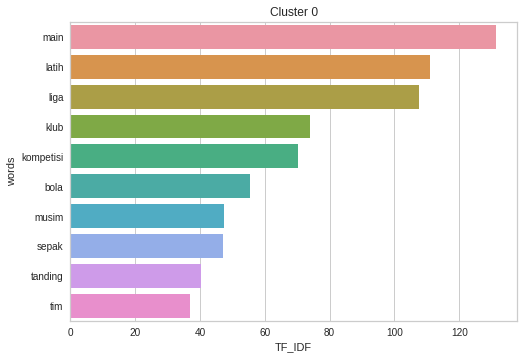

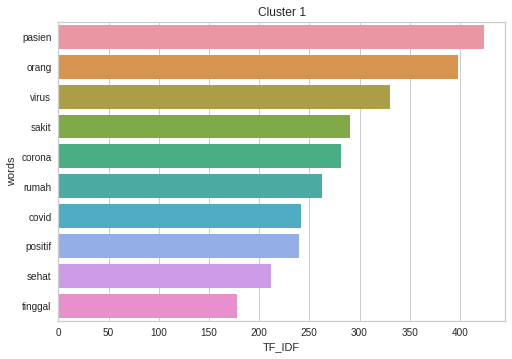

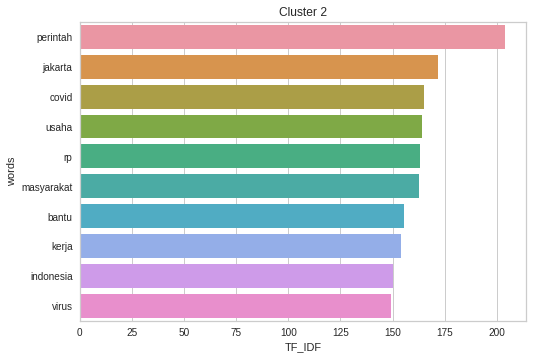

In [ ]:
# extract cluster's label
cluster_label = pd.DataFrame(kmeans.predict(tf_idf_result),columns=["cluster"])

tf_idf_df_lab = pd.concat([tf_idf_result_df,cluster_label],axis=1)

import numpy as np
import seaborn as sns

for i in range(3):
    cluster_df = tf_idf_df_lab.groupby("cluster").sum().T.sort_values(ascending=False,by=i).head(10)[i].to_frame().reset_index()
    cluster_df.columns = ["words","TF_IDF"]
    sns.barplot(x="TF_IDF",y="words",data=cluster_df).set_title('Cluster '+str(i))
    plt.show()


> Berdasarkan Cluster diatas dapat di kelompokkan menjadi

1.   Cluster 0 = Berita Sepak Bola
2.   Cluster 1 = Berita Kebijakan Pemerintah hidup sehat dan Aktivitas dirumah
3.   Cluster 2 = Berita Usaha pemerintah terhadap pekerja dan pelaku usaha terdampak Covid


Terdapat  3 Cluster dari model yang ditentukan yakni Berita Sepak Bola, Kebijakan Pemerintah Pusat terkait Covid-19 baik pola Hidup Sehat maupun Tinggal dirumah serta usaha pemerintah terhadap pekerja, dan Pelaku Usaha yang terdampak Covid-19.

Interpretasi Hasil Cluster menggunakan 10 kata-kata dengan frekuensi tertinggi dari masing-masing kluster. Kata-kata ini diukur dengan nilai TF-IDF dimana semakin besar nilainya maka semakin penting kata tersebut.

***Clster 0 = Berita Sepak Bola***

Mengapa muncul cluster 0 yang merupakan olahraga khususnya Bola? Karena kabar tersebut sangat menjadi perbincangan hangat baik di dalam negeri maupun luar negeri. Berdasarkan Bobot TF IDF juga banyak perbincangan mengenai Kompetisi, Liga, Pemain, Pelatih, Klub, Pertandingan. Secara berita memang ada kontroversi tetap berjalan atau di pending. 
Cluster ini merupakan cluster dengan konten berita yang paling banyak yang membahas tentang sepak bola, dimana berita-berita di dalam kluster tersebut lebih banyak membahas pada kompetisi atau pertandingan antar club atau tim sepak bola pada liga-liga tertentu. Mengapa sepak bola? Sepak bola banyak diminati dan sebagaimana yang diketahui bahwa pada tahun 2020 adalah tahun awal pandemi sehingga akan banyak turnamen atau pertandingan yang ditangguhkan dan menjadi bahan pemberitaan. 


***Cluster 1 = Berita Kebijakan Pemerintah hidup sehat dan Aktivitas di rumah***

Mengapa muncul cluster 1 yang merupakan berita mengenai kebijakan Pemerintah untuk Hidup sehat? 
Berita-berita pada cluster ini lebih banyak membahas terkait informasi perkembangan pandemi covid-19 seperti jumlah kasus positif covid-19 dan kebijakan-kebijakan yang ditempuh oleh pemerintah untuk menekan kasus positif dengan adanya peraturan WFH.

***Cluster 2 = Berita Usaha pemerintah terhadap pekerja dan pelaku usaha terdampak Covid***

Mengapa muncul cluster 2 yang merupakan usaha pemerintah terhadap pekerja dan pelaku usaha yang terdampak Covid-19?
Kota paling banyak tersebut adalah Jakarta. Hal ini berkaitan dengan perintah untuk hidup sehat kepada masyarakat.
Berita-berita pada cluster ini lebih banyak membahas mengenai usaha yang ditempuh pemerintah Indonesia untuk membantu pekerja dan para pelaku usaha yang terdampak pandemi agar perekonomian tetap stabil. 



**Menerapkan Model Cluster (k=5)**

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = MiniBatchKMeans(n_clusters=5)
kmeans.fit(tf_idf_result)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [ ]:
# extract cluster's label
cluster_label = pd.DataFrame(kmeans.predict(tf_idf_result),columns=["cluster"])

In [ ]:
tf_idf_df_lab = pd.concat([tf_idf_result_df,cluster_label],axis=1)

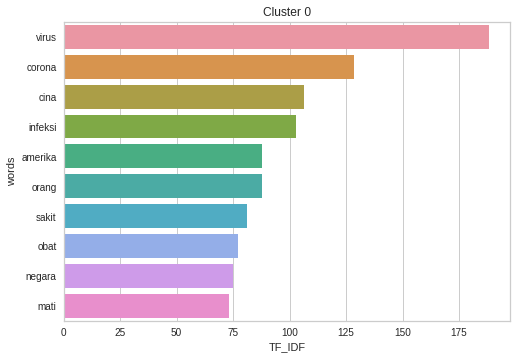

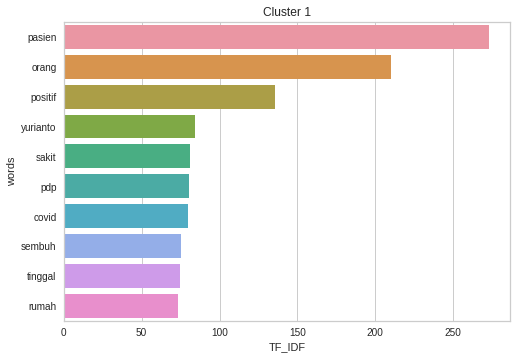

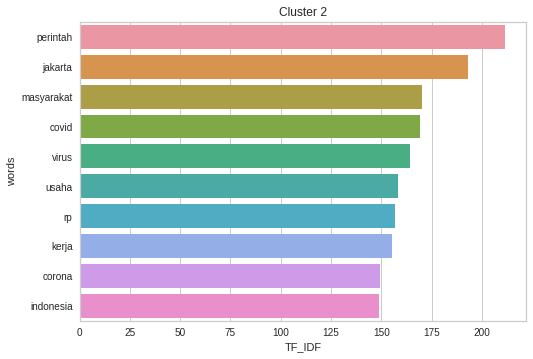

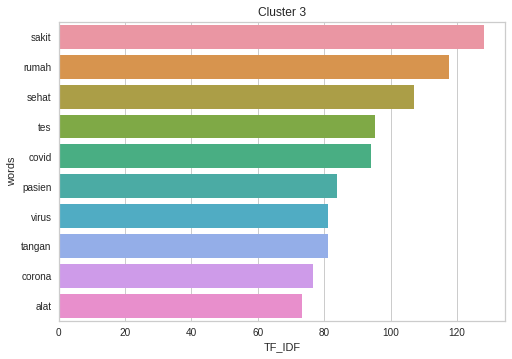

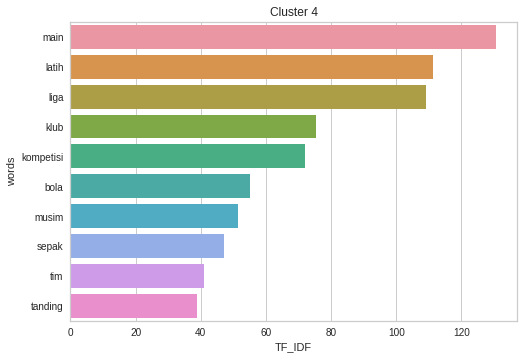

In [ ]:
# extract cluster's label
cluster_label = pd.DataFrame(kmeans.predict(tf_idf_result),columns=["cluster"])

tf_idf_df_lab = pd.concat([tf_idf_result_df,cluster_label],axis=1)

import numpy as np
import seaborn as sns

for i in range(5):
    cluster_df = tf_idf_df_lab.groupby("cluster").sum().T.sort_values(ascending=False,by=i).head(10)[i].to_frame().reset_index()
    cluster_df.columns = ["words","TF_IDF"]
    sns.barplot(x="TF_IDF",y="words",data=cluster_df).set_title('Cluster '+str(i))
    plt.show()



> Berdasarkan Cluster diatas dapat di kelompokkan menjadi
1.   Cluster 0 = Berita Covid-19 Mancanegara
2.   Cluster 1 = Berita Kebijakan Tinggal di Rumah Saja
3.   Cluster 2 = Berita Usaha pemerintah terhadap pekerja dan 
        pelaku usaha terdampak Covid
4.   Cluster 3 = Berita Fasilitas Kesehatan Covid-19
5.   Cluster 4 = Berita Sepak Bola

Terdapat  5 Cluster dari model yang ditentukan yakni Berita Covid-19 Mancanegara, Berita Sepak Bola,  Kebijakan Tinggal di rumah, Kondisi fasilitas kesehatan Covid-19 serta usaha pemerintah terhadap pekerja dan pelaku usaha yang terdampak Covid-19.


Interpretasi Hasil Cluster menggunakan 10 kata-kata dengan frekuensi tertinggi dari masing-masing kluster. Kata-kata penting ini diukur dengan nilai TF-IDF dimana semakin besar nilainya maka semakin penting kata tersebut.

***Cluster 0 = Berita Covid-19 Mancanegara***

Mengapa muncul cluster 0 yang merupakan berita kasus covid-19 di beberapa negara seperti Amerika, Cina. Berita-berita pada cluster ini memiliki konten-konten mengenai virus covid-19, Kasus kematian, Obat serta kasus orang terinfeksi.

***Cluster 1 = Kebijakan Tinggal di Rumah Saja***

Mengapa muncul cluster 1 yang merupakan Perintah untuk dirumah saja? Hal ini berkaitan untuk mengurangi penyebaran covid-19. Selain itu, berita-berita pada cluster ini memiliki konten mengenai perkembangan jumlah pasien kasus positif, jumlah pasien dalam pengawasan, dll yang disampaikan oleh juru bicara pemerintah untuk penanganan covid-19 Achmad Yurianto.

***Cluster 2 = Berita Usaha pemerintah terhadap pekerja dan pelaku usaha terdampak Covid***

Mengapa muncul cluster 2 yang merupakan usaha pemerintah terhadap pekerja dan pelaku usaha yang terdampak Covid-19. Pada cluster ini berita-berita cenderung memiliki konten-konten yang membahas tentang usaha yang ditempuh pemerintah Indonesia, khususnya pemerintah jakarta,  untuk membantu pekerja dan para pelaku usaha yang terdampak pandemi agar perekonomian di Indonesia stabil.

***Cluster 3 = Berita Fasilitas Kesehatan Covid-19***

Mengapa muncul cluster 3 yang merupakan kondisi Fasilitas kesehatan upaya penanganan covid-19 mulai dari Rumah Sakit dan Alat untuk mendeteksi terkonfirmasi Covid-19.

***Cluster 4 = Berita Sepak Bola***

Mengapa muncul cluster 4 yang merupakan olahraga khususnya Bola? Karena kabar tersebut sangat menjadi perbincangan hangat baik di dalam negeri maupun luar negeri. Berdasarkan Bobot TF IDF juga banyak perbincangan mengenai Kompetisi, Liga, Pemain, Pelatih, Klub, Pertandingan. Secara berita memang ada kontroversi tetap berjalan atau di pending




**Insigh**

Sektor yang terdampak dari adanya kasus Covid-19 disini adalah 

1.   Ekonomi
2.   Kompetisi Sepak Bola

Terlihat dari beberapa berita yang dominan mengangkat isu tersebut. Hal ini sangat berkorelasi dengan Kebijakan Pemerintah mulai dari Perintah untuk Hidup sehat, melakukan aktivitas dirumah saja.

Hal ini menjadi pembahasan yang bisa diangkat juga oleh peneliti maupun pemangku kebijakan agar isu-isu yang hangat ini bisa dicari solusi atau menganalisa dampak lebih luas lagi. Serta mencari informasi kembali bagaimana penanganan covid-19 di berbagai negara




---



**Hierarchical Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering()

In [ ]:
arraytf = tf_idf_result.toarray()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Silhouette
hclust_vis_sil = KElbowVisualizer(hclust, k=(2,7),metric="silhouette")
arraytf = tf_idf_result.toarray()
hclust_vis_sil.fit(arraytf)        # Fit the data to the visualizer
hclust_vis_sil.show()        # Finalize and render the figure


In [ ]:
# Within Sum-of-Squared
hclust_vis_wss = KElbowVisualizer(hclust, k=(2,7),metric="distortion")
arraytf = tf_idf_result.toarray()
hclust_vis_wss.fit(arraytf)        # Fit the data to the visualizer
hclust_vis_wss.show()        # Finalize and render the figure

In [ ]:
hclust = AgglomerativeClustering(n_clusters=5)
hclust.fit(arraytf)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [ ]:
hclust

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
content_hclust = content.assign(labels = hclust.labels_)
content_hclust.head()

In [ ]:
content_hclust.groupby('labels').mean()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tf_idf_result)

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters